In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Cleaning**

In [2]:
file_path = "(original- file) Onyx Data -DataDNA Dataset Challenge - Christmas Sales and Trends - December 2023.xlsx"
sheet_names = ['Data DictionaryTransactionID (U', 'Onyx Data -DataDNA Dataset Chal']

# Load the data from the relevant sheet (assuming the second sheet contains the actual data)
data = pd.read_excel(file_path, sheet_name=sheet_names[1])

# Check the first few rows to understand the structure of the dataset
data.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,...,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,2020-12-24,07:27:59,441,27,Other,City_15,NaN,True,106,...,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,2022-11-18,14:36:39,340,43,Male,City_13,NaN,True,816,...,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,2019-12-26,20:23:50,31,25,Other,City_7,92.0,False,508,...,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,2018-11-13,23:08:08,39,64,Male,City_20,100.0,False,710,...,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,2020-12-13,04:38:08,344,26,Other,City_10,90.0,False,687,...,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionID         10000 non-null  int64         
 1   Date                  10000 non-null  datetime64[ns]
 2   Time                  10000 non-null  object        
 3   CustomerID            10000 non-null  int64         
 4   Age                   10000 non-null  int64         
 5   Gender                10000 non-null  object        
 6   Location              10000 non-null  object        
 7   StoreID               4582 non-null   float64       
 8   OnlineOrderFlag       10000 non-null  bool          
 9   ProductID             10000 non-null  int64         
 10  ProductName           10000 non-null  object        
 11  Category              10000 non-null  object        
 12  Quantity              10000 non-null  int64         
 13  UnitPrice        

In [4]:
# Convert 'Date' to datetime and 'Time' to a time object 
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

In [5]:
data.duplicated().sum()

0

In [6]:
# Check for missing values
data.isnull().sum()

TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64

In [7]:
# Fill missing categorical values with (most frequent) and numerical values with 0 or median
data['StoreID'].fillna(0, inplace=True)
data['DeliveryTime'].fillna(data['DeliveryTime'].median(), inplace=True)
data['ShippingMethod'].fillna(data['ShippingMethod'].mode()[0], inplace=True)

# Fill missing values of Event with (most frequent event)
data['Event'].fillna(data['Event'].mode()[0], inplace=True)

C:\Users\Malak\AppData\Local\Temp\ipykernel_14364\1841925366.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['StoreID'].fillna(0, inplace=True)
C:\Users\Malak\AppData\Local\Temp\ipykernel_14364\1841925366.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [8]:
# Recheck for missing values
data.isnull().sum()

TransactionID           0
Date                    0
Time                    0
CustomerID              0
Age                     0
Gender                  0
Location                0
StoreID                 0
OnlineOrderFlag         0
ProductID               0
ProductName             0
Category                0
Quantity                0
UnitPrice               0
TotalPrice              0
PaymentType             0
PromotionApplied        0
DiscountAmount          0
GiftWrap                0
ShippingMethod          0
DeliveryTime            0
Weather                 0
Event                   0
CustomerSatisfaction    0
ReturnFlag              0
dtype: int64

**Vizualization**

In [9]:
# Set a style for the plots
sns.set(style="whitegrid")

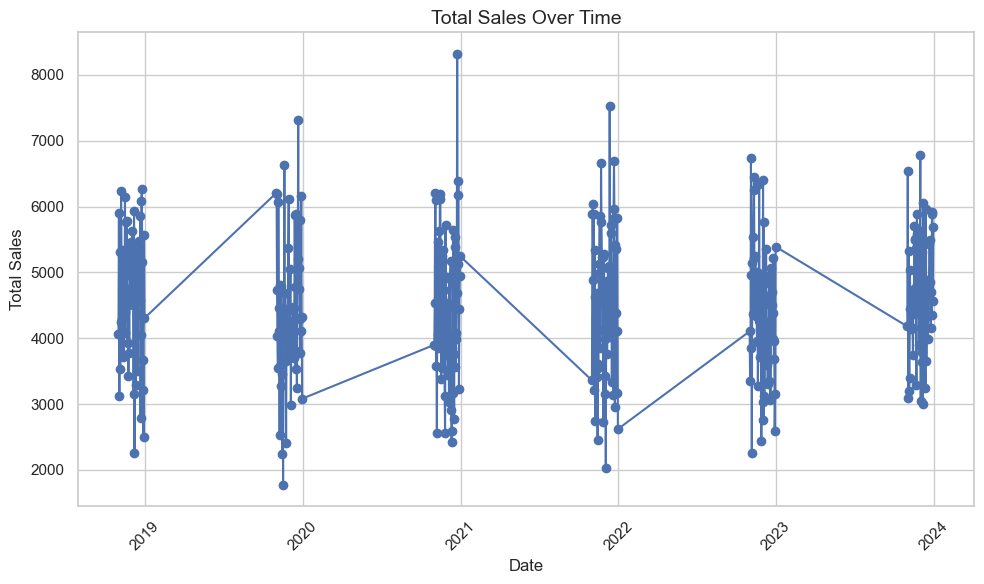

In [10]:
# Sales trend over time
sales_over_time = data.groupby('Date')['TotalPrice'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o', color='b')
plt.title('Total Sales Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

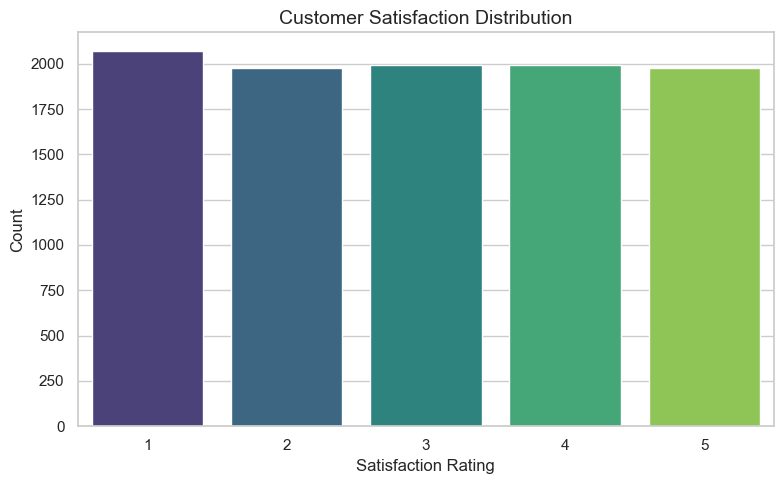

In [11]:
# Customer satisfaction distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='CustomerSatisfaction', palette='viridis')
plt.title('Customer Satisfaction Distribution', fontsize=14)
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


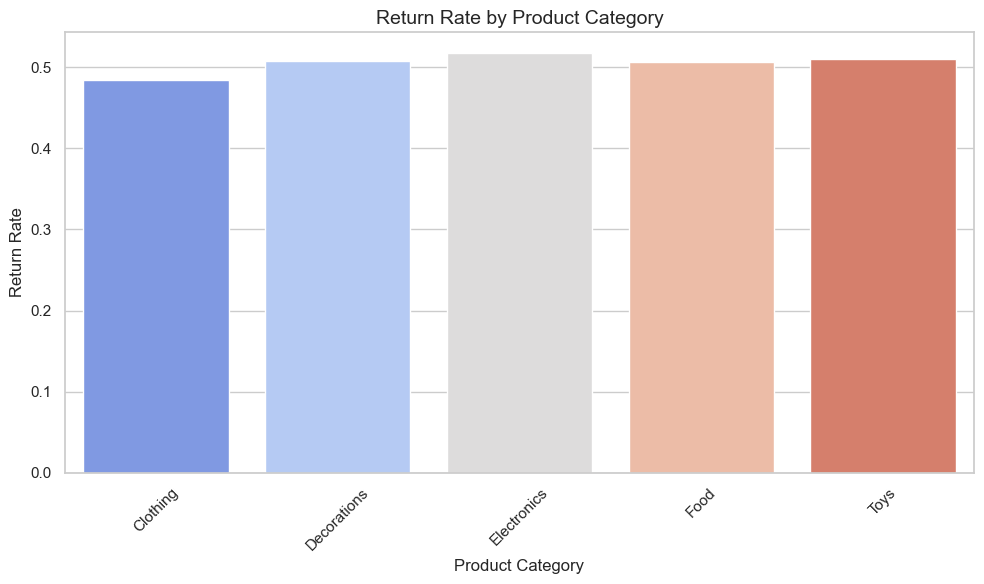

In [12]:
# Return rate by product category
return_rate_by_category = data.groupby('Category')['ReturnFlag'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=return_rate_by_category.index, y=return_rate_by_category.values, palette='coolwarm')
plt.title('Return Rate by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Return Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

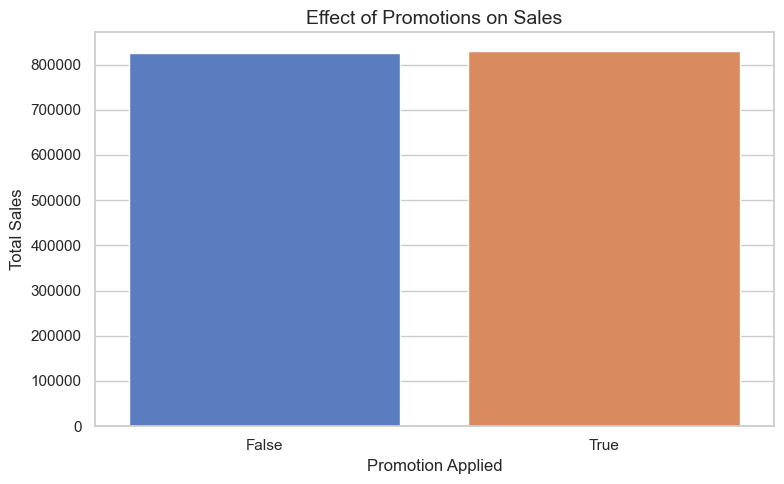

In [13]:
# Effect of promotions on sales
promotion_sales = data.groupby('PromotionApplied')['TotalPrice'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=promotion_sales.index, y=promotion_sales.values, palette='muted')
plt.title('Effect of Promotions on Sales', fontsize=14)
plt.xlabel('Promotion Applied')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

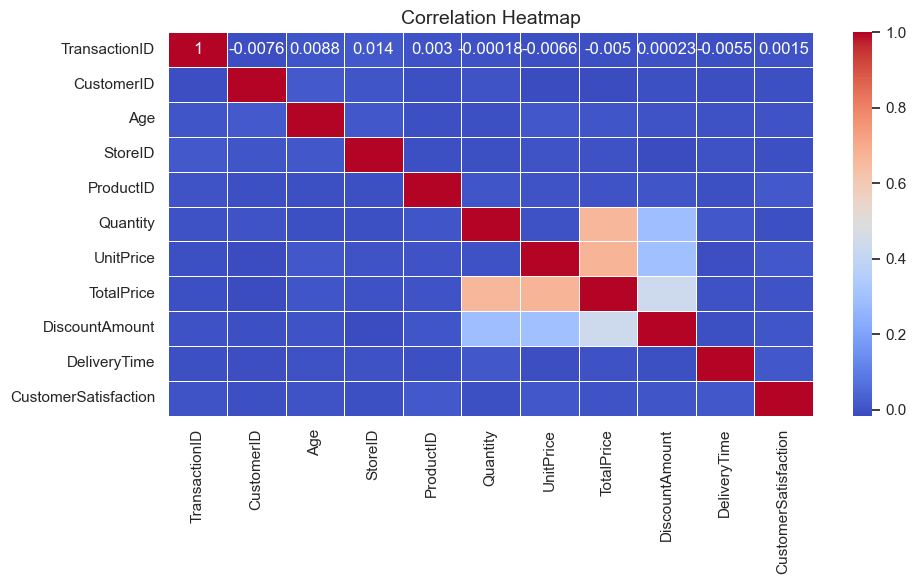

In [14]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()


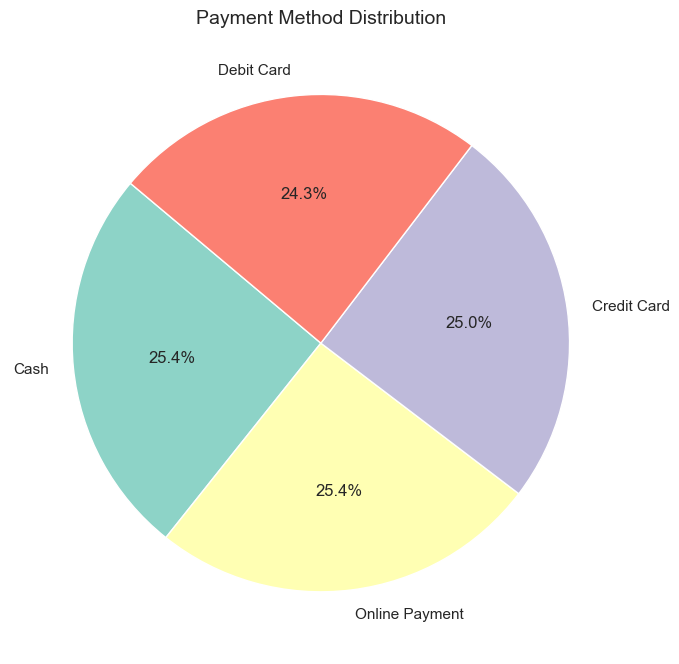

In [15]:
# Payment Method Distribution Pie Chart
payment_distribution = data['PaymentType'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(payment_distribution, labels=payment_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Payment Method Distribution', fontsize=14)
plt.tight_layout()
plt.show()

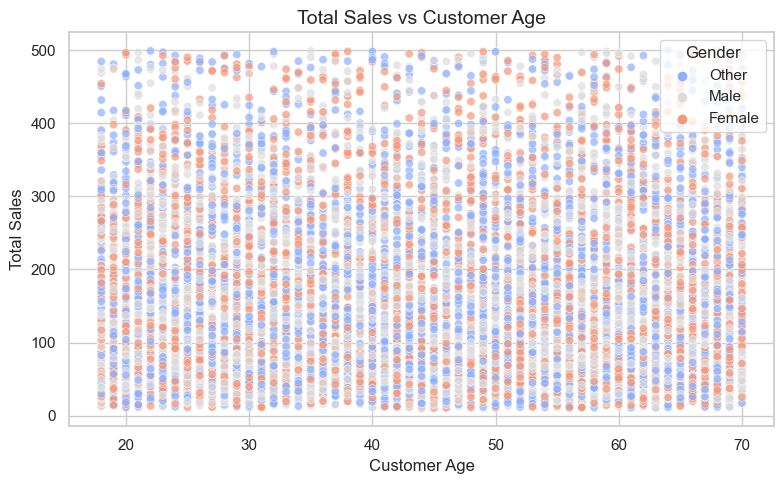

In [16]:
# Scatter Plot of Total Sales vs Customer Age
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='TotalPrice', data=data, hue='Gender', palette='coolwarm', alpha=0.7)
plt.title('Total Sales vs Customer Age', fontsize=14)
plt.xlabel('Customer Age')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


In [17]:
# Save the cleaned data 
data.to_excel('cleaned_christmas_sales_data.xlsx', index=False)
